<a href="https://colab.research.google.com/github/PaoloMadda01/PytorchFundamentals/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Book version of notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fittinf the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fittinf the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in ML.

* Excel speadsheet
* Images of any kinf
* Videos
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's  create some *known* data using the linear regression formula.

We'll use a linear regression formula (Y = weight*X + bias) to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len (X), len(Y)

(50, 50)

### Splitting data into training and test sets (one of the most important concept in machine learning in general)

Let's create a trining and test set with our data.

In [5]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

#Questo codice suddivide un set di dati in set di addestramento e test.
#La prima riga calcola l'indice in base al quale suddividere i dati prendendo l'80% della lunghezza di X.
#Le due righe successive utilizzano questo indice per suddividere X e Y in insiemi di addestramento e test.
#L'ultima riga stampa le lunghezze di ciascun set.

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares preditions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green (c="g")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  # Show the legend
  plt.legend(prop={"size": 14});

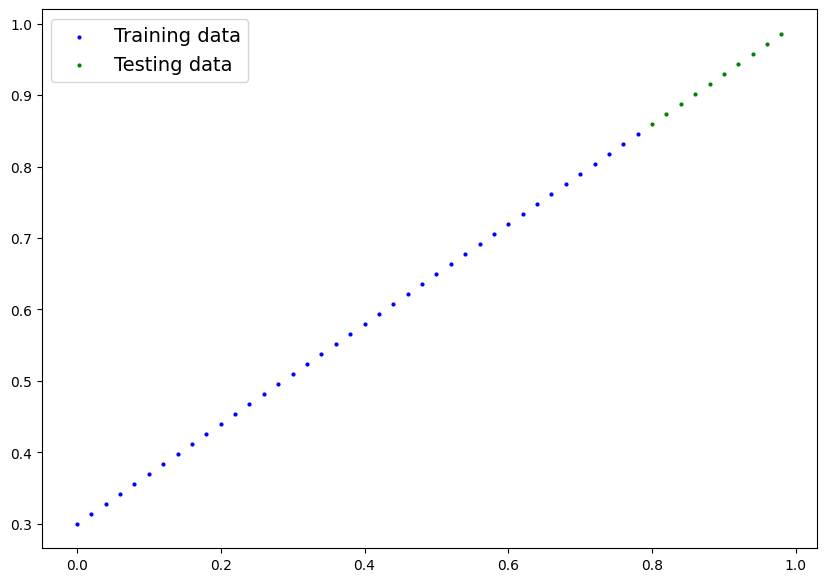

In [7]:
plot_predictions();

## 2. Building model

Our first PyTorch model


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent   https://www.youtube.com/watch?v=IHZwWFHWa-w&t=759s
2. Backpropagation    https://www.youtube.com/watch?v=Ilg3gGewQ5U


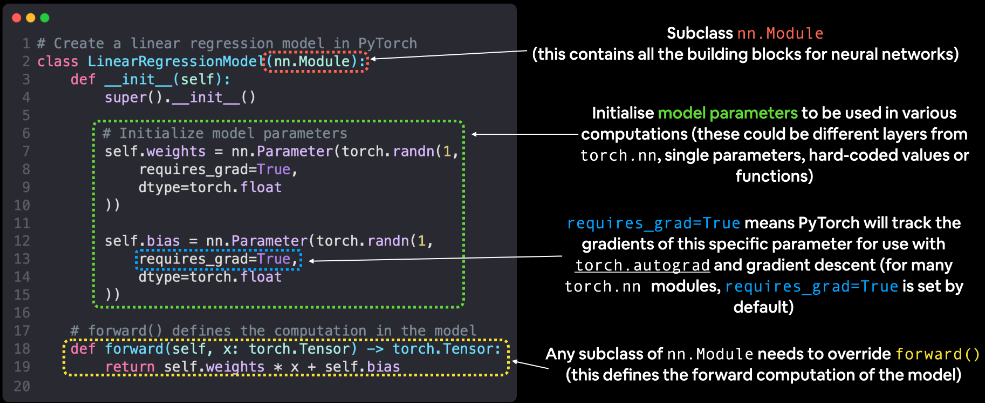

In [8]:
from torch import nn


# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits(eredita) from nn.Module // Base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, X: torch.Tensor)  -> torch.Tensor: # <- "x" is the input data
    return self.weights * X + self.bias   # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of buildings for computational graphs (a neural network can be considered a compuraruin graphs)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyThorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module  subclasses require you to overwirte fprward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html





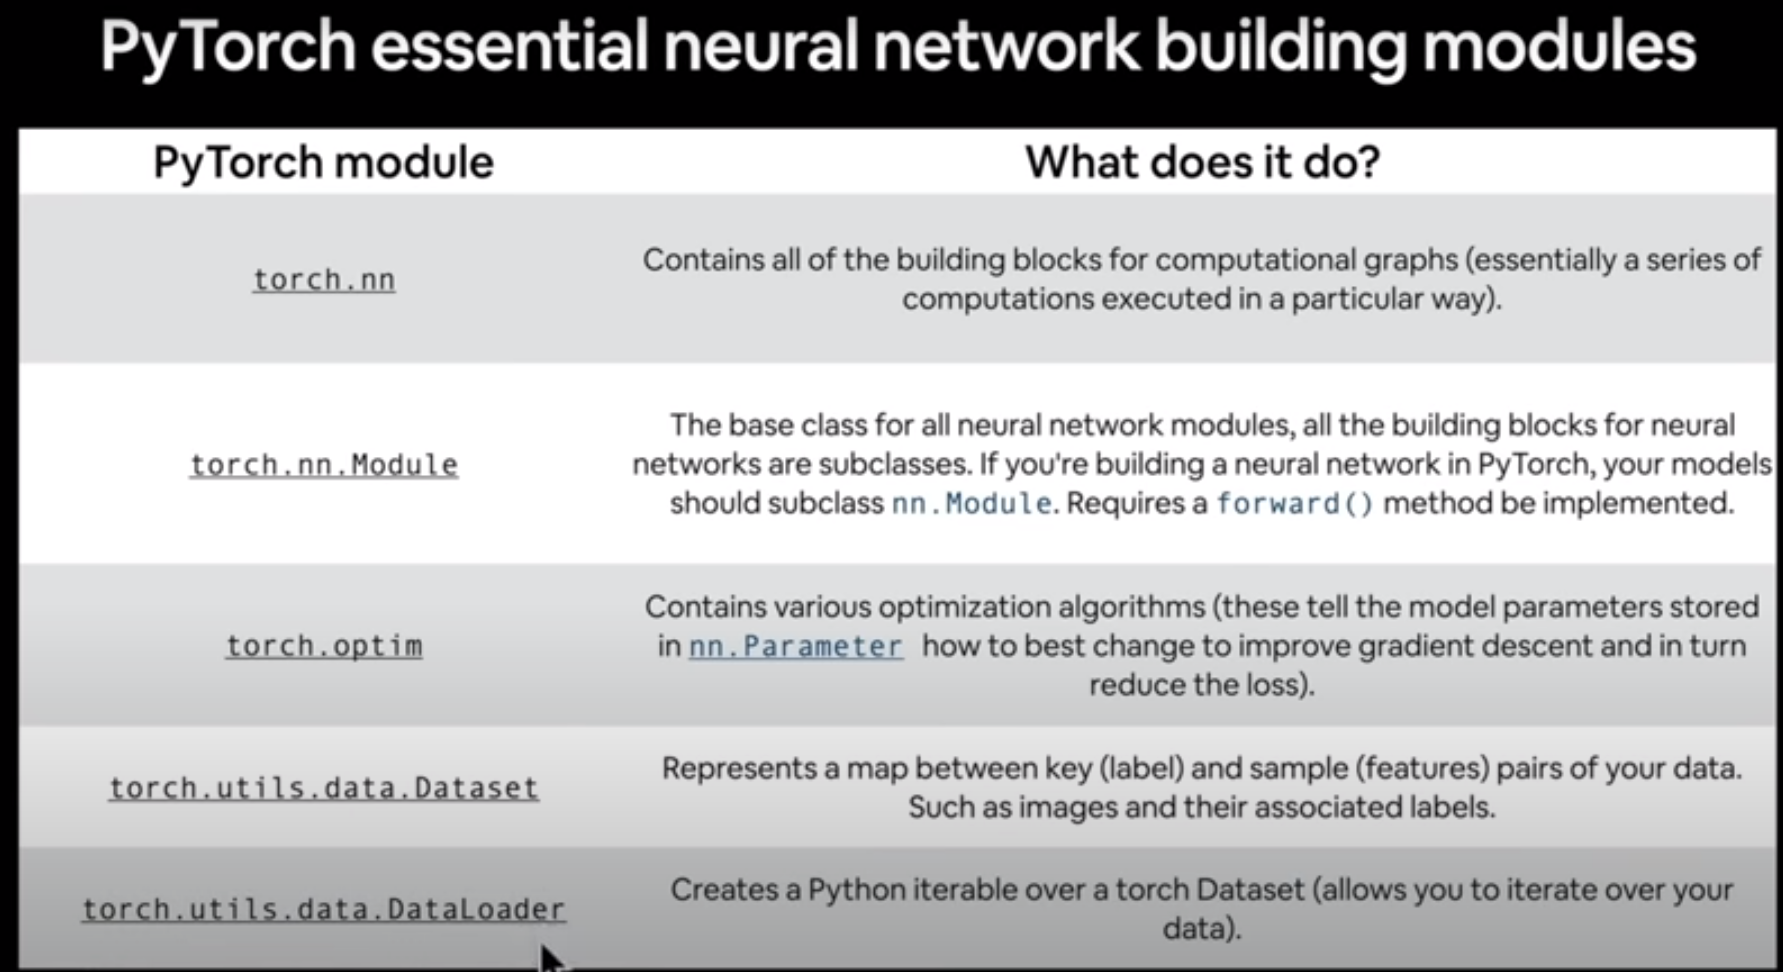

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an istance of the model (this is a  subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predition using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'

when we pass data through our model, it's going to run it through the 'forward()' method.

In [11]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
#with torch.no_grad():
#  y_predes = model_0(X_test)

# Altro modo per farlo:
#y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


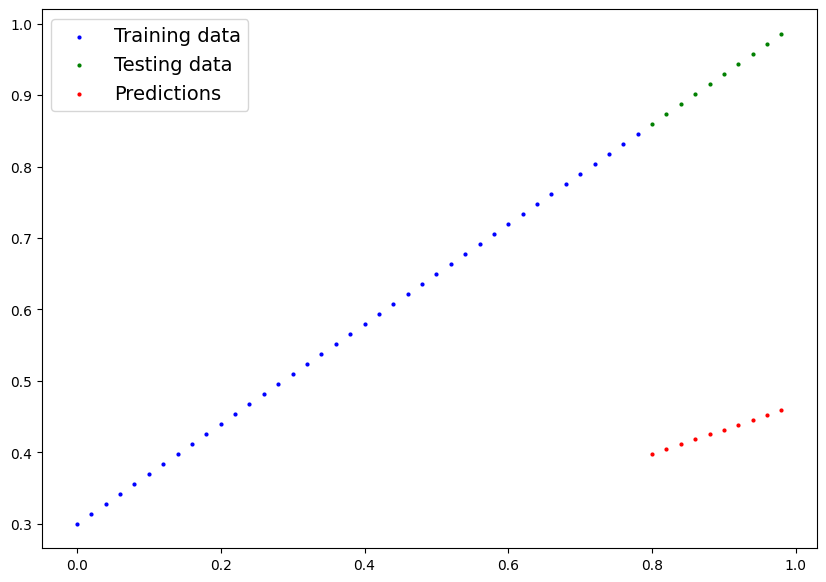

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss fuction.

Things we need to train:

* **Loss fuction:** A fuction to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss fuction.

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# List named parameters
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 )  # lr = learning rate = possibly the most important hyperparameter you can set

# loss function misura l'errore. Optimizer aggiusta per ridurre il loss utilizzando l'algoritmo SGD.
# params: quale parametro devo migliorare.

In [18]:
loss_fn

L1Loss()

Q: Which loss function and optiizer should I use?
A: This will be problem specific problem. But with experience, you'll get an idea of what works and what doesn't with your particualr problem set.

For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.
But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimezer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


I gradienti indicano la direzione e l'entità di massima variazione della funzione di costo rispetto ai parametri, mentre la perdita misura l'errore tra le previsioni del modello e i valori di target. I gradienti sono utilizzati per aggiornare i parametri del modello, mentre la perdita è utilizzata per valutare le prestazioni del modello e guidare l'ottimizzazione.



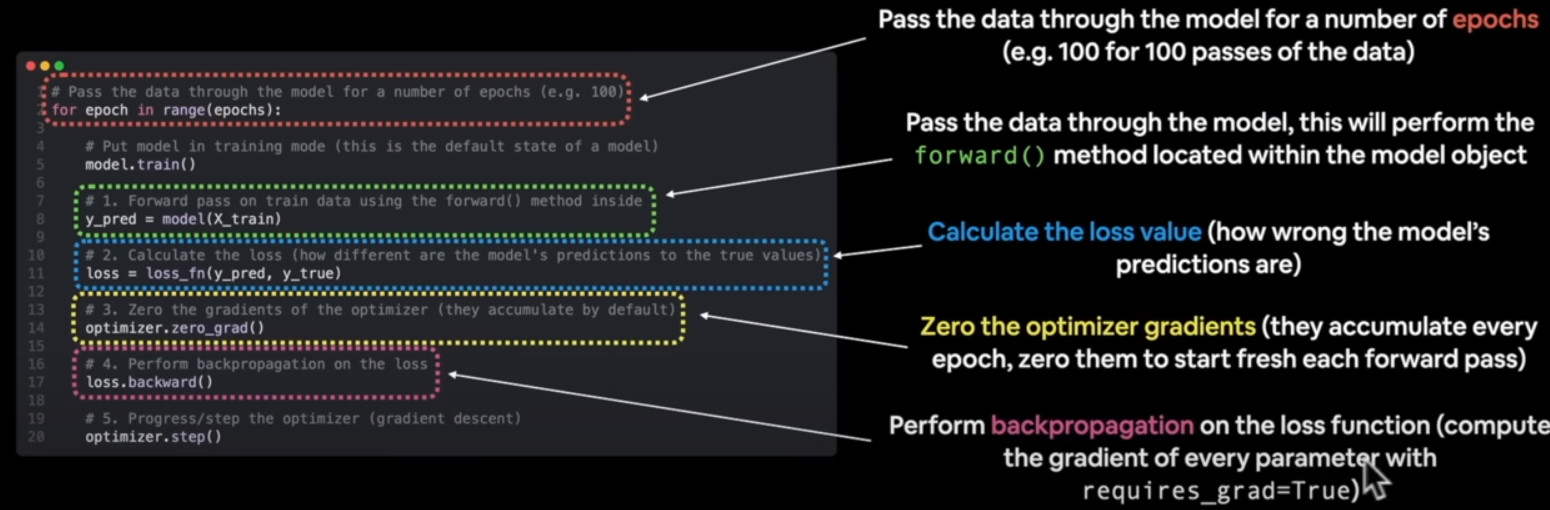

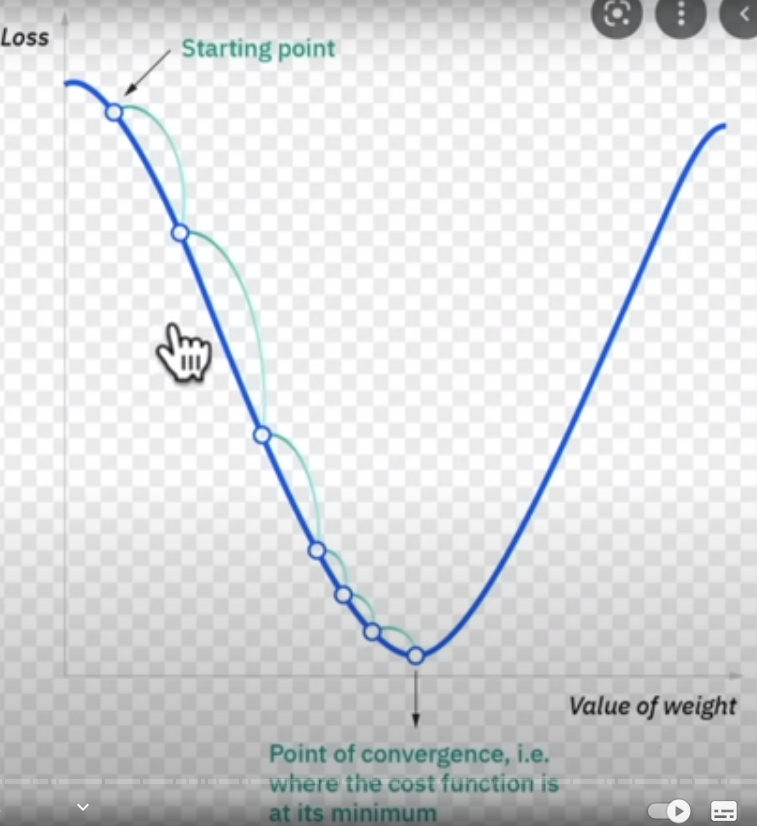

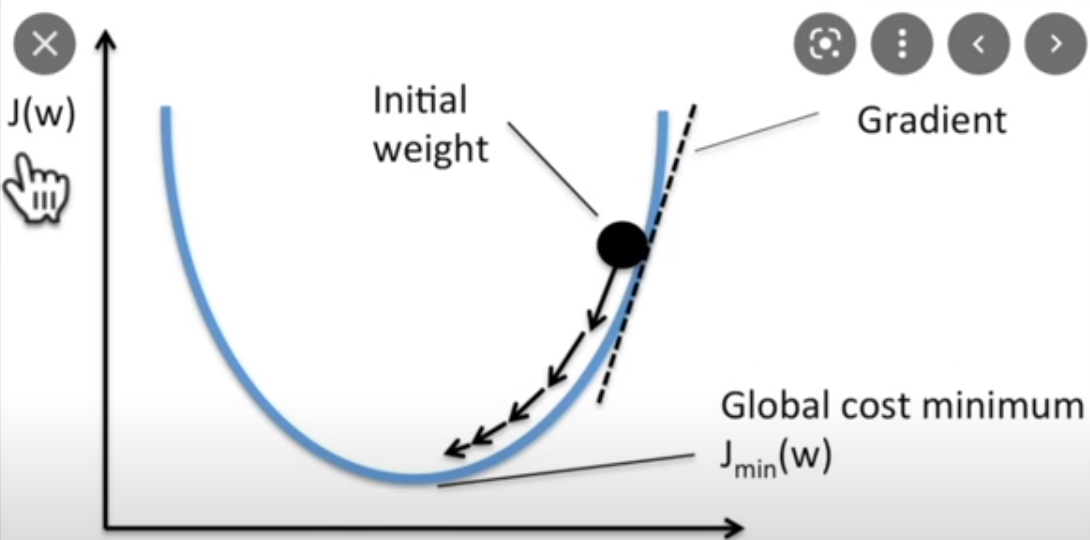

pytorch does this for every parameter

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200


# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients (il gradiente sarebbe la pensenza della collina che dovrebbe essere a zero)
                    # imposta il modello model_0 in modalità di addestramento. In PyTorch, ciò significa che tutti i parametri del modello che richiedono gradienti saranno
                    # configurati per richiedere gradienti. Durante la fase di addestramento, i gradienti sono calcolati per questi parametri in modo da poter eseguire la
                    # backpropagation e aggiornare i pesi del modello.

    # 1. Forward pass
    y_preds = model_0(X_train)
                    # esegue il passaggio di propagazione in avanti (forward pass) del modello model_0 sull'input di addestramento X_train.
                    # Viene calcolata una previsione y_preds utilizzando il modello.

    # 2. Calculate the loss
    loss = loss_fn(y_preds, Y_train) # Calculating the difference between our models predictions on the training data set and the ideal training values (input first, target second
    print(f"Loss: {loss} ")

    # 3. Optimiezer zero grad
    optimizer.zero_grad()
                    # Azzera i gradienti dei parametri del modello. Prima di eseguire la backpropagation, è necessario azzerare i gradienti accumulati
                    # dai passaggi precedenti per evitare che si accumulino nel calcolo dei nuovi gradienti.

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
                    # Esegue la backpropagation dell'errore calcolato rispetto ai parametri del modello. I gradienti vengono calcolati utilizzando la regola della catena,
                    # propagando l'errore all'indietro attraverso i vari strati del modello. Questo calcolo dei gradienti viene eseguito utilizzando la perdita calcolata
                    # nella riga precedente.

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # By default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
                    # esegue un passo di ottimizzazione utilizzando l'ottimizzatore specificato. L'ottimizzatore aggiorna i parametri del modello in base ai gradienti
                    # calcolati durante la backpropagation. L'aggiornamento dei parametri avviene in base all'algoritmo di ottimizzazione utilizzato
                    # (ad esempio, gradient descent). L'ottimizzatore modifica i valori dei parametri nella direzione opposta al gradiente, cercando
                    # di minimizzare la funzione di costo.

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
                    # imposta il modello model_0 in modalità di valutazione (evaluation mode). Quando il modello è in modalità di valutazione,
                    # viene disattivato il tracciamento dei gradienti.
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code

      # 1. Do the forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, Y_test)


    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.31288138031959534 
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153 
Epoch: 1 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005 
Epoch: 2 | Loss: 0.28983935713768005 | Test loss: 0.4541231691837311
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224 
Epoch: 3 | Loss: 0.2783183455467224 | Test loss: 0.44065219163894653
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716 
Epoch: 4 | Loss: 0.26679736375808716 | Test loss: 0.4271811842918396
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295 
Epoch: 5 | Loss: 0.2552763521671295 | Test loss: 0.41371020674705505
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0

In [21]:
weight, bias

(0.7, 0.3)

In [22]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [23]:
#plot_predictions(predictions=y_preds)

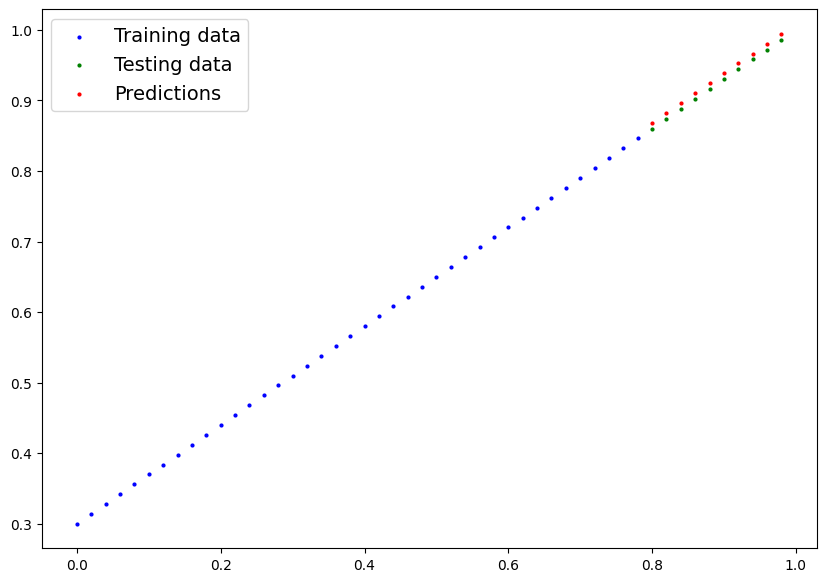

In [24]:
plot_predictions(predictions=y_preds_new);

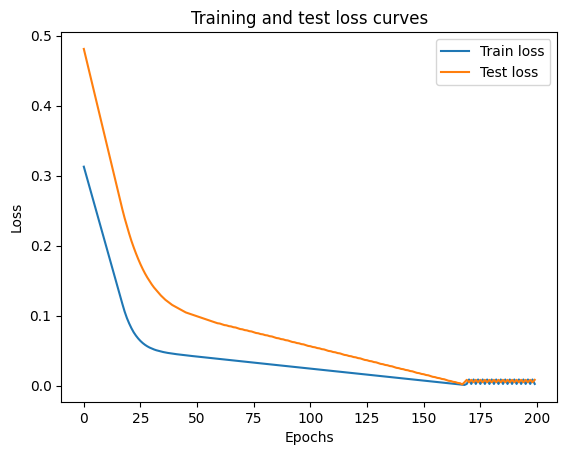

In [25]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss") # We're converting our loss values of the training loss to NumPy and if you call from the fundamental section
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. 'torch.save()' - allows you save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

In [26]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

since we saved our model's 'state_dict()' rather the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# To load in a saved state_dict we have to instantiate a new instance of our model class(
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Puttin it all together
Let's go back through the steps above and see it all in one place

In [31]:
# ImportPyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

Tis means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is availaible, the code will default to using GPU.

In [32]:
# Steup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [56]:
# Create some date using the linea regression formula of y= weight * X +bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errores will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
# Slit data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

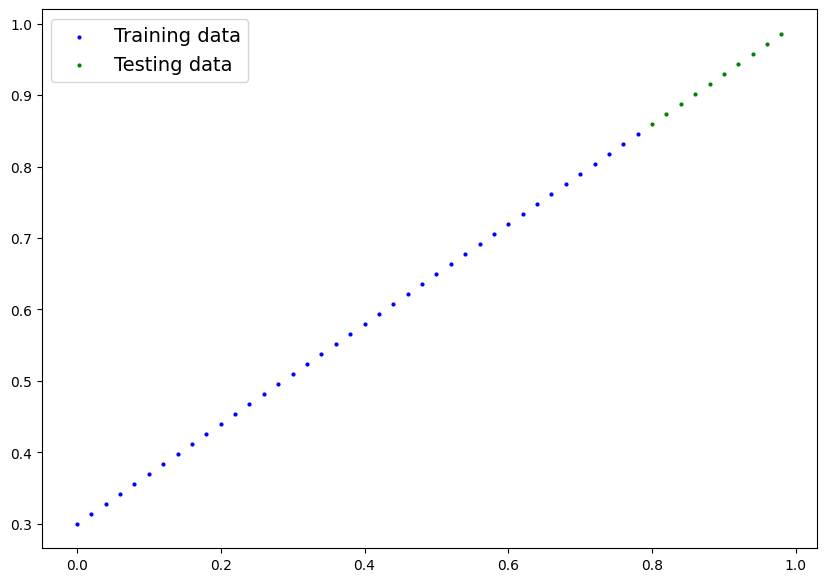

In [58]:
# Plot the data
# Note: if you don't have the plot_preditions() function loaded, this will errore
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [59]:
# Crste a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters (nn = neural network) / also called: linear transform, probing laywe, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # il primo e l'ultimo layer sono di 1 dimensione

  # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

La differenza principale tra i due modelli riguarda la definizione dei parametri. Nel model_0, i parametri vengono creati manualmente come attributi della classe utilizzando nn.Parameter, mentre nel model_1 i parametri vengono creati internamente utilizzando nn.Linear, semplificando la gestione dei parametri.

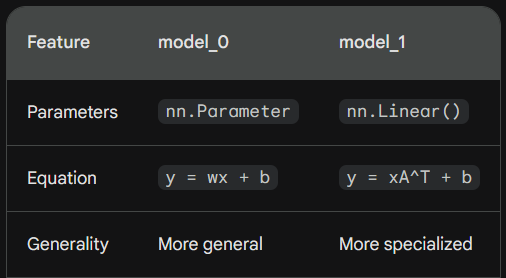


L'equazione y = xA^T + b viene utilizzata in PyTorch perché è più efficiente dal punto di vista computazionale dell'equazione y = wx + b. L'equazione y = xA^T + b può essere risolta in modo più efficiente usando il prodotto di matrici, mentre l'equazione y = wx + b può essere risolta solo usando l'addizione e la moltiplicazione per scalari.

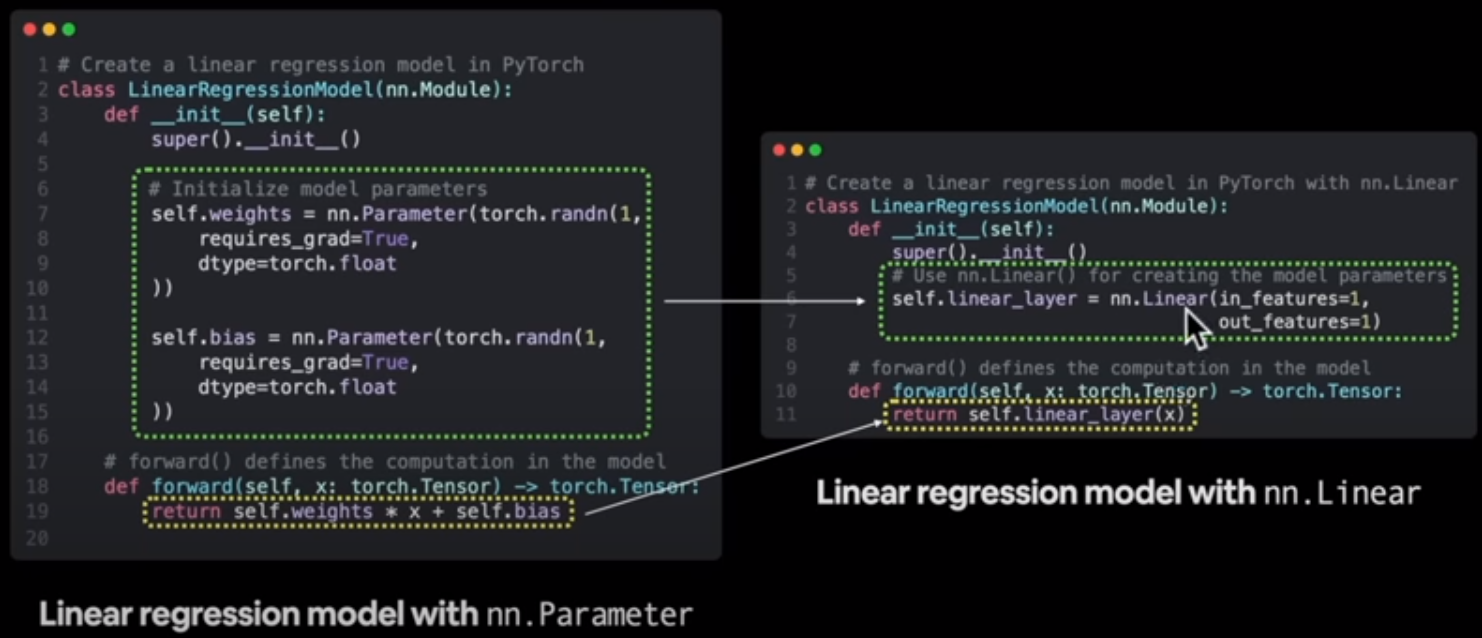

In [60]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [61]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [62]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [63]:
# Setuo loss fuction
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [64]:
# Let's write a trining loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Foreward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [65]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [66]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [67]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

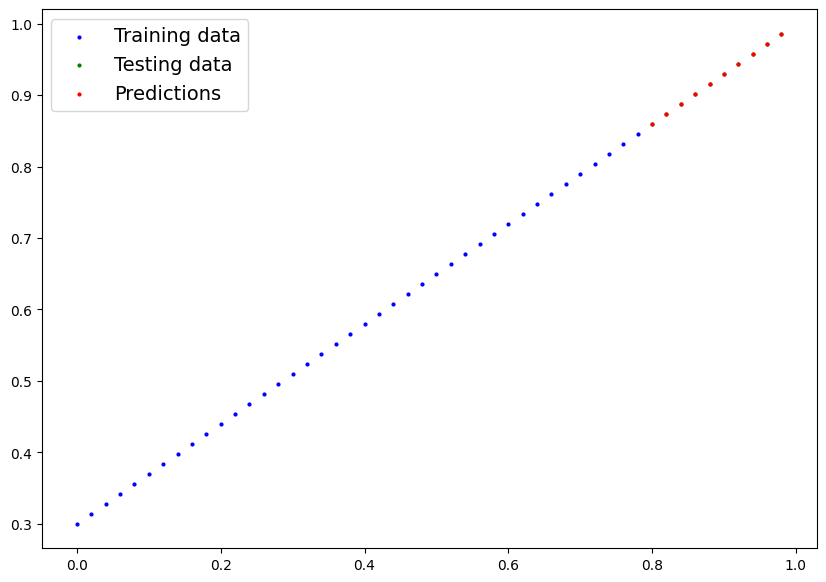

In [68]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu()) # Riporto in cpu perchè plot_predictions è stato sviluppato con matplotlib con cpu

### 6.5 Saving and loading a trained model

In [70]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [71]:
# Load a PyTorch

# Create a new istance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the target model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [72]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [73]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [74]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Exercises
All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.
Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.
Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.
Resource: See the exercises notebooks templates and solutions on the course GitHub.

Extra-curriculum
Listen to The Unofficial PyTorch Optimization Loop Song (to help remember the steps in a PyTorch training/testing loop).
Read What is torch.nn, really? by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
Spend 10-minutes scrolling through and checking out the PyTorch documentation cheatsheet for all of the different PyTorch modules you might come across.
Spend 10-minutes reading the loading and saving documentation on the PyTorch website to become more familiar with the different saving and loading options in PyTorch.
Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
Wikipedia page for gradient descent
Gradient Descent Algorithm — a deep dive by Robert Kwiatkowski
Gradient descent, how neural networks learn video by 3Blue1Brown
What is backpropagation really doing? video by 3Blue1Brown
Backpropagation Wikipedia Page